# Use linear transforms between successive frames to straighten video

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
from scipy.stats import multivariate_normal
from scipy.io import loadmat 

from otimage import readers, imagerep
from otimage.utils import plot_maxproj

In [5]:
# Frame index in raw file
t1 = 3
t2 = 6

# Load two successive frames from dataset
img_path = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'
with readers.ZimmerReader(img_path) as reader:
#img_path = '/home/mn2822/Desktop/WormTraces/data/Vivek/1010_tail_03/data.mat'
#with readers.VivekReader(img_path) as reader:
    
    frame_1 = reader.get_frame(t1)
    frame_2 = reader.get_frame(t2)
    img_shape = frame_1.shape

# Load MP components
#mp_path = '/home/mn2822/Desktop/WormOT/data/zimmer/mp_components/mp_0000_0050.mat'
mp_path = '/home/mn2822/Desktop/WormOT/data/vivek/1010_tail_03/mp_components/mp_0000_0900.mat'
mp_data = loadmat(mp_path)
cov = mp_data['cov']
pts_1 = mp_data['means'][t1, :, :]
pts_2 = mp_data['means'][t2, :, :]
wts_1 = mp_data['weights'][t1, :, 0]
wts_2 = mp_data['weights'][t2, :, 0]

# Frame index in transformation file
idx = t2 - 3

# Load transformations
reg_path = '/home/mn2822/Desktop/WormOT/data/zimmer/registration/reg2_0003_0008.mat'
#reg_path = '/home/mn2822/Desktop/WormOT/data/vivek/1010_tail_03/registration/reg2_0000_0900.mat'
reg_data = loadmat(reg_path)
alpha = reg_data['f_alpha'][idx, :]
beta = reg_data['f_beta'][idx, :, :]

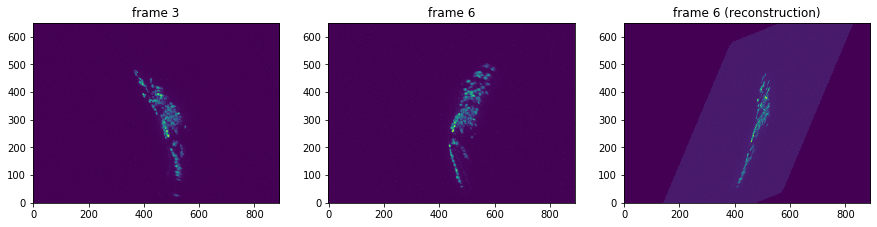

In [6]:
# Apply linear transform to first frame to reconstruct frame at time t
inv_beta = np.linalg.inv(beta)
inv_alpha = -inv_beta @ alpha
rec_img_2 = affine_transform(frame_1, inv_beta, inv_alpha)

# MP reconstruction
#rec_wts = reg_data['rec_wts']
#rec_pts_2 = reg_data['rec_pts'][idx, :, :].astype(int)
#rec_img_2 = imagerep.reconstruct_image(rec_pts_2, [cov], rec_wts.T, img_shape)

plt.figure(figsize=(15, 15))

plt.subplot(131)
plot_maxproj(frame_1)
plt.title(f'frame {t1}')
        
plt.subplot(132)
plot_maxproj(frame_2)
plt.title(f'frame {t2}')
        
plt.subplot(133)
plot_maxproj(rec_img_2)
plt.title(f'frame {t2} (reconstruction)');

In [17]:
dets = [np.linalg.det(reg_data['f_beta'][t, :, :]) for t in range(5)]
dets = np.array(dets)
print(dets)

[1.         0.58506567 0.43575332 0.37819521 0.33691793]


In [6]:
#t = 6
#rec_pts_t = reg_data['rec_pts'][t, :, :].astype(int)
#rec_img_t = imagerep.reconstruct_image(rec_pts_t, [cov], wts_0, img_shape)
#plot_maxproj(rec_img_t)

In [ ]:
#img_shape = frame_1.shape
#mp_img_1 = imagerep.reconstruct_image(pts_1, [cov], wts_1, img_shape)
#mp_img_2 = imagerep.reconstruct_image(pts_2, [cov], wts_2, img_shape)

In [ ]:
#plt.figure(figsize=(10, 10))

#plt.subplot(221)
#plot_maxproj(frame_1)
#plt.title('frame 1')
        
#plt.subplot(222)
#plot_maxproj(frame_2)
#plt.title('frame 2')

#plt.subplot(223)
#plot_maxproj(mp_img_1)
#plt.title('MP reconstruction')

#plt.subplot(224)
#plot_maxproj(mp_img_2)
#plt.title('MP reconstruction');